## Monte Carlo - Forecasting Stock Prices - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Forecasting Future Stock Prices – continued:

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

ticker = 'MSFT' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2000-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

drift.values
stdev.values

t_intervals = 250
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

***

Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [2]:
S0 = data.iloc[-1]
S0

MSFT    65.68
Name: 2017-04-07 00:00:00, dtype: float64

Create a variable price_list with the same dimension as the daily_returns matrix. 

In [3]:
price_list = np.zeros_like(daily_returns)
price_list

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [4]:
price_list[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

Set the values on the first row of the price_list array equal to S0.

In [5]:
price_list[0] = S0
price_list

array([[ 65.68,  65.68,  65.68, ...,  65.68,  65.68,  65.68],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       ..., 
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ]])

Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.

In [6]:
for t in xrange(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [7]:
price_list

array([[ 65.68      ,  65.68      ,  65.68      , ...,  65.68      ,
         65.68      ,  65.68      ],
       [ 65.1879551 ,  67.09426843,  65.31745651, ...,  66.42838699,
         66.18729028,  65.88361973],
       [ 67.61813753,  66.32837477,  64.90177103, ...,  65.45334141,
         65.88366858,  66.19479685],
       ..., 
       [ 79.83388222,  74.2802797 ,  69.48561461, ...,  38.43732021,
         94.2728207 ,  51.2870778 ],
       [ 80.84569366,  75.48523306,  70.1419662 , ...,  39.12022901,
         95.84476789,  51.75607037],
       [ 79.68753877,  77.15079265,  70.28412784, ...,  38.98320606,
         91.13260421,  50.6844428 ]])

Finally, plot the obtained price list data.

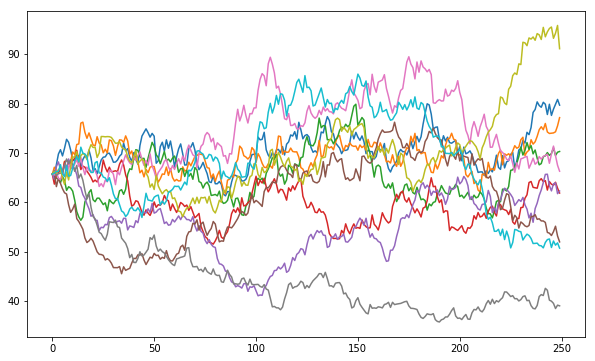

In [8]:
plt.figure(figsize=(10,6))
plt.plot(price_list);